In [1]:
#202209235汪洋
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

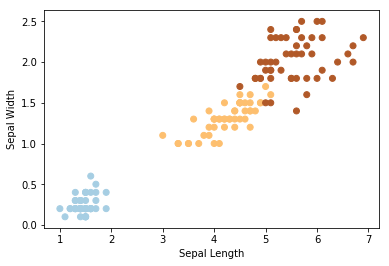

In [ ]:
iris = datasets.load_iris()
X = iris.data[:,2:4]
y = iris.target

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [4]:
#训练集和测试集划分
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_test[:10]

array([[4.7, 1.2],
       [1.7, 0.3],
       [6.9, 2.3],
       [4.5, 1.5],
       [4.8, 1.4],
       [1.5, 0.4],
       [3.6, 1.3],
       [5.1, 2.3],
       [4.5, 1.5],
       [3.9, 1.2]])

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_test_std[:10]

array([[ 5.35295827e-01,  1.75297293e-03],
       [-1.17067529e+00, -1.18150376e+00],
       [ 1.78634131e+00,  1.44795564e+00],
       [ 4.21564419e-01,  3.96171883e-01],
       [ 5.92161531e-01,  2.64698913e-01],
       [-1.28440670e+00, -1.05003079e+00],
       [-9.02269170e-02,  1.33225943e-01],
       [ 7.62758643e-01,  1.44795564e+00],
       [ 4.21564419e-01,  3.96171883e-01],
       [ 8.03701950e-02,  1.75297293e-03]])

In [7]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(random_state=0).fit(X_train_std,y_train)
print('逻辑回归准确率为：',lr.score(X_test_std,y_test))
print('逻辑回归分类报告：',classification_report(y_test,lr.predict(X_test_std),digits=5))

逻辑回归准确率为： 0.9666666666666667
逻辑回归分类报告：              precision    recall  f1-score   support

          0    1.00000   1.00000   1.00000        10
          1    1.00000   0.88889   0.94118         9
          2    0.91667   1.00000   0.95652        11

avg / total    0.96944   0.96667   0.96641        30



In [10]:
svc_L = svm.LinearSVC(C=1.0)
#svc = svm.SVC(C=1.0,kernel='rbf',decision_function_shape='ovr',gamma=0.01)
svc_L.fit(X_train_std,y_train)

print('逻辑回归准确率为：',svc_L.score(X_test_std,y_test))
#print('逻辑回归准确率为：',svc.score(X_test_std,y_test))
print('逻辑回归分类报告：\n',classification_report(y_test,svc_L.predict(X_test_std),digits=5))
#print('逻辑回归分类报告：\n',classification_report(y_test,svc.predict(X_test_std),digits=5))

逻辑回归准确率为： 0.9666666666666667
逻辑回归分类报告：
              precision    recall  f1-score   support

          0    1.00000   1.00000   1.00000        10
          1    1.00000   0.88889   0.94118         9
          2    0.91667   1.00000   0.95652        11

avg / total    0.96944   0.96667   0.96641        30



In [18]:
def plot_boun(model,axis):
    x0,x1=np.meshgrid(
        np.linspace(axis[0]-0.2,axis[1]+0.2,int((axis[1]-axis[0])*100)),
        np.linspace(axis[2]-0.2,axis[3]+0.2,int((axis[3]-axis[2])*100))
    )
    
    X_new = np.c_[x0.ravel(),x1.ravel()]
    
    y_predict = model.predict(X_new)
    
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom)

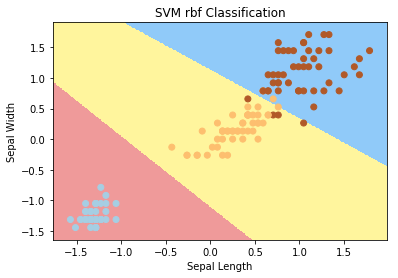

In [20]:
x_combined_std = np.vstack((X_train_std,X_test_std))
y_combine = np.hstack((y_train,y_test))

min_1, max_1 = x_combined_std[:,0].min(),x_combined_std[:,0].max()

min_2, max_2 = x_combined_std[:,1].min(),x_combined_std[:,1].max()

plot_boun(svc,axis=[min_1, max_1, min_2, max_2])
plt.scatter(x_combined_std[:,0],x_combined_std[:,1],c=y_combine,cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('SVM rbf Classification')
plt.show()

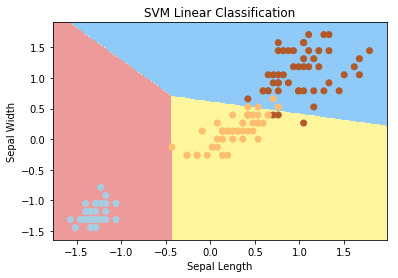

In [ ]:
plot_boun(svc_L,axis=[min_1, max_1, min_2, max_2])
plt.scatter(x_combined_std[:,0],x_combined_std[:,1],c=y_combine,cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('SVM Linear Classification')
plt.show()

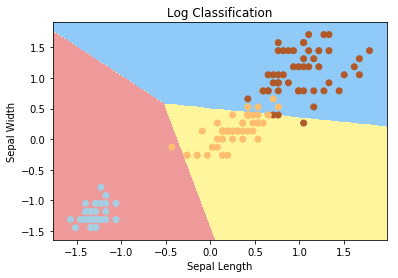

In [22]:
plot_boun(lr,axis=[min_1, max_1, min_2, max_2])
plt.scatter(x_combined_std[:,0],x_combined_std[:,1],c=y_combine,cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Log Classification')
plt.show()